## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [0]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [2]:
import os
import keras

os.environ["CUDA_VISIBLE_DEVICES"]= "0"

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = 2*(((x - x.min()) / (x.max() - x.min()))-0.5)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units = 10, num_neurons=[512,256,128,64,32,16]):
  input_layer = keras.layers.Input(input_shape)
  
  for i, n_units in enumerate(num_neurons):
    if i == 0:
        x = keras.layers.Dense(units =n_units, activation = "relu" , name="hiden_layer"+str(i+1))(input_layer)
    else :
        x = keras.layers.Dense(units =n_units, activation = "relu" , name="hiden_layer"+str(i+1))(x)
  
  out = keras.layers.Dense(units=output_units, activation ="softmax", name = "output")(x)
  
  model = keras.models.Model(inputs=[input_layer], outputs=[out])
  return model


In [28]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hiden_layer1 (Dense)         (None, 512)               1573376   
_________________________________________________________________
hiden_layer2 (Dense)         (None, 256)               131328    
_________________________________________________________________
hiden_layer3 (Dense)         (None, 128)               32896     
_________________________________________________________________
hiden_layer4 (Dense)         (None, 64)                8256      
_________________________________________________________________
hiden_layer5 (Dense)         (None, 32)                2080      
_________________________________________________________________
hiden_layer6 (Dense)         (None, 16)                528       
__________

In [0]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [0]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [32]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.9285 - acc: 0.3135 - val_loss: 1.7020 - val_acc: 0.3998
Epoch 2/100
50000/50000 [==============================] - 2s 46us/step - loss: 1.5995 - acc: 0.4352 - val_loss: 1.5331 - val_acc: 0.4616
Epoch 3/100
50000/50000 [==============================] - 2s 48us/step - loss: 1.4576 - acc: 0.4867 - val_loss: 1.4528 - val_acc: 0.4886
Epoch 4/100
50000/50000 [==============================] - 2s 48us/step - loss: 1.3479 - acc: 0.5252 - val_loss: 1.4196 - val_acc: 0.5069
Epoch 5/100
50000/50000 [==============================] - 2s 45us/step - loss: 1.2610 - acc: 0.5575 - val_loss: 1.3863 - val_acc: 0.5128
Epoch 6/100
50000/50000 [==============================] - 2s 46us/step - loss: 1.1846 - acc: 0.5825 - val_loss: 1.3776 - val_acc: 0.5294
Epoch 7/100
50000/50000 [==============================] - 2s 46us/step - loss: 1.1061 - acc: 0.6109 - val_loss: 1.3653 - 

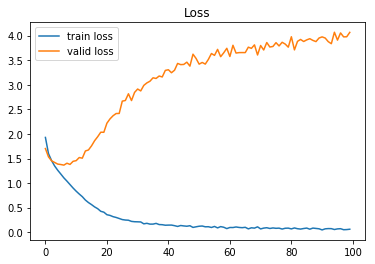

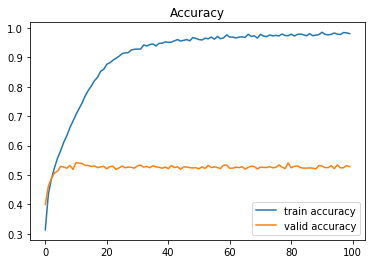

In [33]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()